In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), '..'))

import json
import svgling
from svgling.figure import Caption, SideBySide, RowByRow
from shangrla.IRVVisualisationUtils import treeListToTuple, parseAssertions, printAssertions, buildRemainingTreeAsLists, buildPrintedResults, printTrees

#a_file = open("data/SFDA2019_PrelimReport11VBMJustDAAssertions.json")
a_file = open("data/log.json")
auditfile = json.load(a_file)

c_file = open("./data/SFDA2019/SFDA2019_CandidateManifest.json")
candidatefile = json.load(c_file)
        
(apparentWinner, apparentNonWinners, WOLosers,IRVElims) = parseAssertions(auditfile, candidatefile)
                
elimTrees = buildPrintedResults(apparentWinner[0], apparentNonWinners, WOLosers,IRVElims)

apparentWinner = 15
candidates = ['15', '16', '17', '18']
apparent Non Winners: ['16', '17', '18']
Apparent winner: 
15-SUZY LOFTUS
Apparently eliminated:
16-LEIF DAUTCH,
17-NANCY TUNG,
18-CHESA BOUDIN




# RAIRE example assertion parser and visualizer

This notebook parses and visualizes RAIRE assertions.
Right now it's hardcoded to read RAIRE_sample_audit1.json, but you can change that.
Start by executing the rectangle above to understand the election and the apparent winner.
The audit needs to exclude all the other possible winners, though we don't care about other elimination orders in which the apparent winner still wins.
Execute the next code snippet to see the trees of possible alternative elimination orders.
Each tree will be pruned according to RAIRE's assertions, with each pruned branch tagged with the assertion that allowed us to exclude it.
You (the auditor) need to check that all the leaves end in an assertion, which shows that they have been excluded.


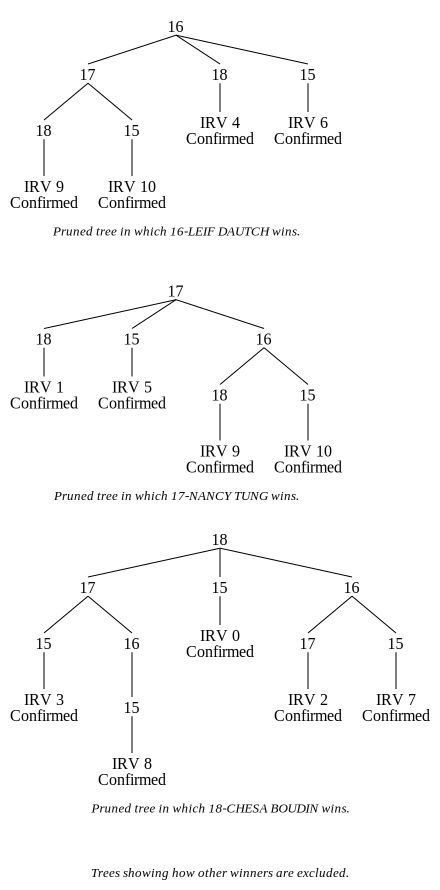

In [2]:
Caption(printTrees(elimTrees),'Trees showing how other winners are excluded.')


Now print all the assertions.  This gives you an explanation of the meaning of each one.


In [3]:
printAssertions(WOLosers,IRVElims)



IRV assertions: 
Confirmed:   IRV  0: Candidate 15 cannot be eliminated next when {'17', '16'} are eliminated.
Confirmed:   IRV  1: Candidate 18 cannot be eliminated next when {'15', '16'} are eliminated.
Confirmed:   IRV  2: Candidate 17 cannot be eliminated next when {'15'} are eliminated.
Confirmed:   IRV  3: Candidate 15 cannot be eliminated next when {'16'} are eliminated.
Confirmed:   IRV  4: Candidate 18 cannot be eliminated next when {'17', '15'} are eliminated.
Confirmed:   IRV  5: Candidate 15 cannot be eliminated next when {'18', '16'} are eliminated.
Confirmed:   IRV  6: Candidate 15 cannot be eliminated next when {'17', '18'} are eliminated.
Confirmed:   IRV  7: Candidate 15 cannot be eliminated next when {'17'} are eliminated.
Confirmed:   IRV  8: Candidate 15 cannot be eliminated next when {} are eliminated.
Confirmed:   IRV  9: Candidate 18 cannot be eliminated next when {'15'} are eliminated.
Confirmed:   IRV 10: Candidate 15 cannot be eliminated next when {'18'} are

Now the audit begins! We now apply a Risk Limiting Audit to test each of the assertions above.
For each assertion, we consider the opposite hypothesis, that candidate C *can* be eliminated at that point. We then try to audit until that hypothesis can be rejected.  If all the hypotheses are rejected, the election result is declared correct.  At any time, if the audit has failed to reject all the hypotheses, a full manual recount can be conducted.
